In [1]:
#!/usr/bin/python3
import re
import csv
import sys
import os
import math
import pandas as pd
from math import sin, cos, sqrt, atan2, radians
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

regex = r'^\S+?,\S+?,\S+? \S+?,\S+? \S+?,\S+?,\S+?,\S+?,\S+?,\S+?,\S+?,\S+?,\S+?,\S+?,\S+?,\S+?,\S+?,\S+?,\S+?,\S+?,\S+?,\S+?,\S+?,\S+?,\S+?,\S+?,\S+?,\S+?,\S+?,\S+?,\S+?,'

# 14dB output 
output_power = 14
systematic_error = 2+6

# init empty arrays for the csv files. 
db5=[]
db15=[]
db25=[]
db35=[]
db45=[]
db55=[]

res_arrays = [db5, db15, db25, db35, db45, db55]
count_array = 0
for curFileName in ['5dB.csv','15dB.csv','25dB.csv','35dB.csv','45dB.csv','55dB.csv']:
  file1 = open(curFileName,"r")
  Lines = file1.readlines()
  Lines = Lines[2:]  
  for line in Lines:    
    data = re.search(regex, line.strip())[0].split(',') 
    payload = data[6]    
    sf = data[13]
    number = data[15]
    gw_id = data[19]
    gw_rssi = data[20]
    gw_snr = data[21]
    if gw_id.upper() == "00007076FF020EF7":
      res_arrays[count_array].append(float(gw_rssi) + min(float(gw_snr),0))
        
  count_array = count_array+1

print("TOTAL:" + str(len(db5)))
print("TOTAL:" + str(len(db15)))
print("TOTAL:" + str(len(db25)))
print("TOTAL:" + str(len(db35)))
print("TOTAL:" + str(len(db45)))
print("TOTAL:" + str(len(db55)))

TOTAL:100
TOTAL:100
TOTAL:100
TOTAL:100
TOTAL:100
TOTAL:100


-78.72
[0. 1. 2. 3. 4. 5.]


<AxesSubplot:xlabel='80 [dB] + Attenuation [dB]', ylabel='RPP [dB]'>

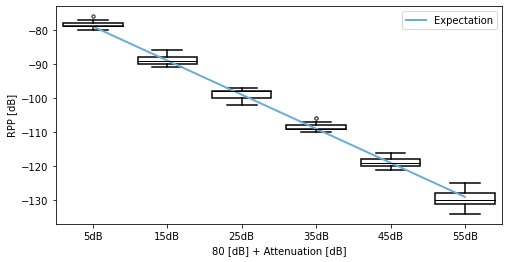

In [2]:
from matplotlib.colors import ListedColormap
from matplotlib.ticker import ScalarFormatter

numberOfPlottingFeatures = 1
colors = sns.color_palette("Blues", numberOfPlottingFeatures)
linestyles = ['-', '--', '-.', ':']

props = dict(boxes=colors[0], whiskers="black", medians="black", caps="black")
medianprops = dict(linestyle=linestyles[0], linewidth=1, color='black')
flierprops = dict(marker='o', markerfacecolor='white', markersize=3, linewidth=1, linestyle='none')

fig, ax = plt.subplots(figsize=(8,4))

sns.boxplot(data=res_arrays,ax=ax,medianprops=medianprops,flierprops=flierprops)
plt.setp(ax.artists, edgecolor = 'k', facecolor='w')
plt.setp(ax.lines, color='k')

names = ["5dB","15dB","25dB","35dB","45dB","55dB"]
ax.set(xticklabels=names)
ax.set_xlabel('80 [dB] + Attenuation [dB]')   
ax.set_ylabel('RPP [dB]')

#ax2 = ax.twinx()

print(np.mean(db5))

x_lin = np.linspace(0,5,6)
y_lin = [output_power-systematic_error-80-5,  output_power-systematic_error-80-15, 
         output_power-systematic_error-80-25, output_power-systematic_error-80-35,
         output_power-systematic_error-80-45, output_power-systematic_error-80-55]
print(x_lin)

sns.lineplot(x=x_lin,y=y_lin,ax=ax,color=colors[0], linewidth=2, label='Expectation')
#ax2.set_ylim(0,7)